- Problem Overview: Summarize task (e.g., classification) and real-world relevance (1 para).
- Data & EDA: Describe source; visualize distributions/correlations; note issues (e.g., missing values).
- Preprocessing & Features: Detail cleaning, scaling/encoding, selection (e.g., correlation-based).
- Modeling: Train 1-2 models (e.g., logistic regression, random forest); basic tuning (e.g., grid search).
- Evaluation: Metrics (e.g., accuracy/F1); train-test split or CV; compare to original.
- Insights: Key findings, limitations, suggestions (e.g., add ensemble).

### Problem Overview
The Titanic dataset explores factors influencing survival during the Titanic tragedy. This is a classic binary classification problem, where the goal is to predict whether a passenger survived or not. The problem holds real-world relevance, as it highlights how various socioeconomic and demographic factors, such as age, sex, passenger class, and fare, can impact survival outcomes in disasters. By analyzing these data points, we can gain valuable insights into patterns of survival and human behavior under extreme circumstances.

### Data and EDA
The dataset comes from the Kaggle Titanic competition and contains information on 891 passengers from the training set. It includes 12 features such as passenger class (Pclass), name, sex, age, number of siblings/spouses aboard (SibSp), number of parents/children aboard (Parch), ticket number, fare, cabin, and port of embarkation. The target variable is 'Survived' (0 = died, 1 = survived).

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

train_data = pd.read_csv("./input/train.csv")
train_data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [6]:
train_data.describe()


PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [7]:
# Check for missing values
print("Missing values per column:")
print(train_data.isnull().sum())


Missing values per column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


The dataset contains 891 passengers with 12 features. Initial inspection reveals missing values in Age (177 missing), Cabin (687 missing), and Embarked (2 missing). Age and Cabin have significant missing data that will need to be addressed during preprocessing.

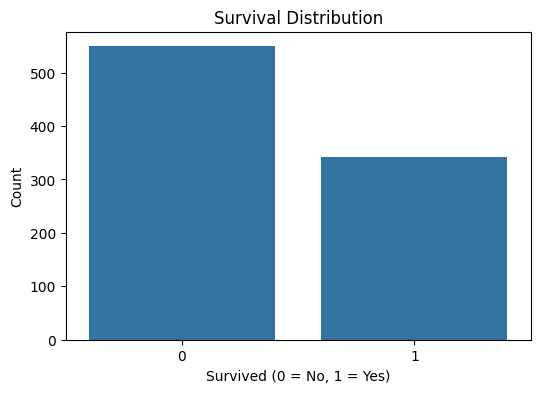

Overall survival rate: 38.38%


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Survival rate
survival_rate = train_data['Survived'].value_counts()
plt.figure(figsize=(6,4))
sns.barplot(x=survival_rate.index, y=survival_rate.values)
plt.title('Survival Distribution')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

print(f"Overall survival rate: {train_data['Survived'].mean():.2%}")

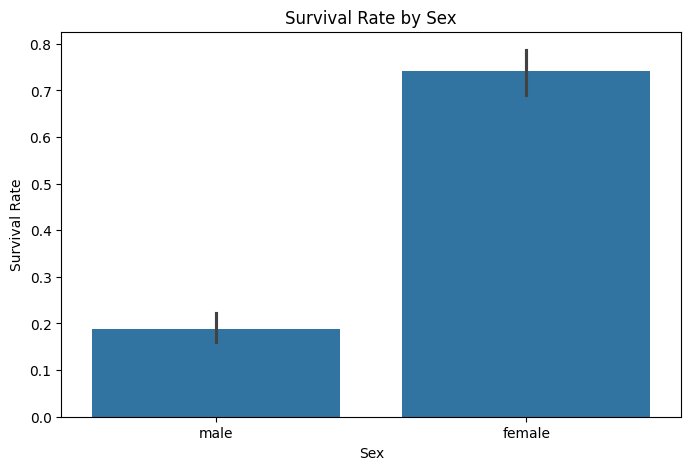

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


In [ ]:
# Survival by sex
plt.figure(figsize=(8,5))
sns.barplot(data=train_data, x='Sex', y='Survived')
plt.title('Survival Rate by Sex')
plt.ylabel('Survival Rate')
plt.show()

print(train_data.groupby('Sex')['Survived'].mean())

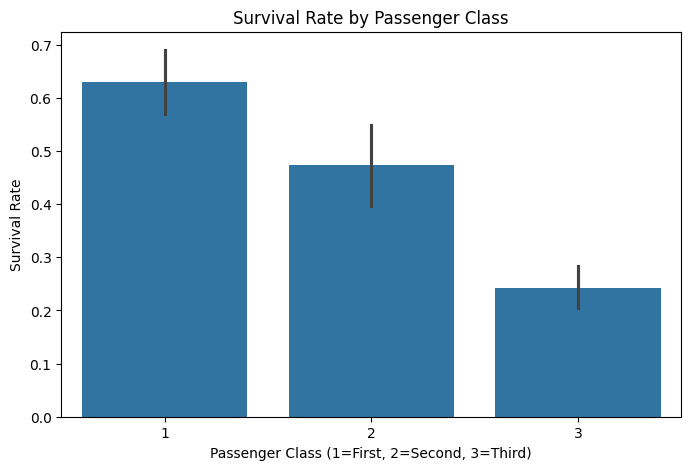

In [10]:
plt.figure(figsize=(8,5))
sns.barplot(data=train_data, x='Pclass', y='Survived')
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class (1=First, 2=Second, 3=Third)')
plt.ylabel('Survival Rate')
plt.show()

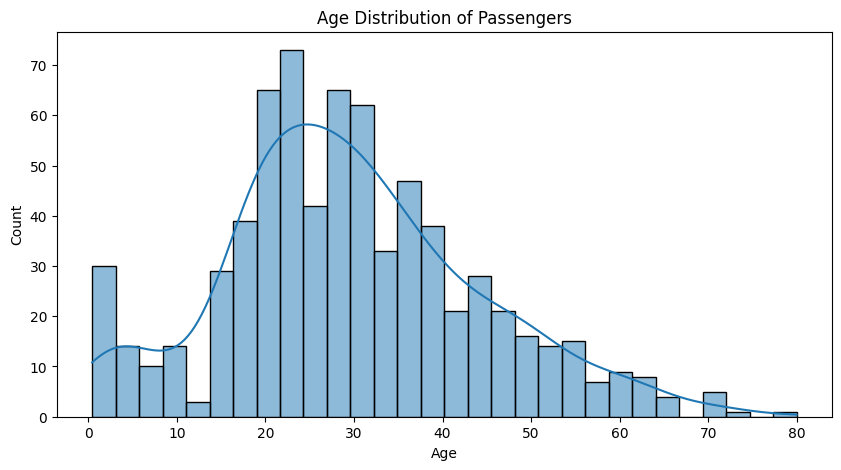

In [11]:
plt.figure(figsize=(10,5))
sns.histplot(data=train_data, x='Age', bins=30, kde=True)
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.show()

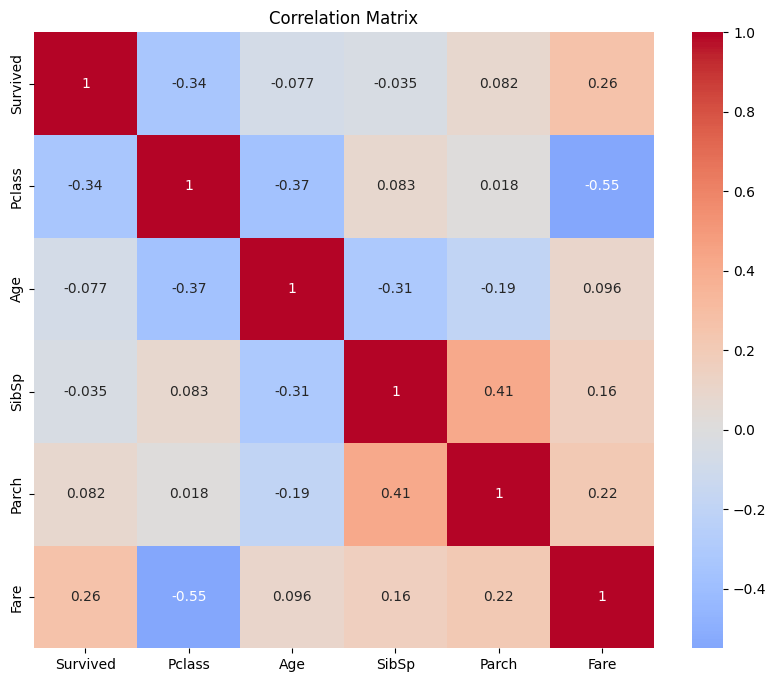

In [12]:
# Select numeric columns only
numeric_cols = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
plt.figure(figsize=(10,8))
sns.heatmap(train_data[numeric_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

**Correlations**: The correlation matrix shows that Pclass (negative correlation) and Fare (positive correlation) are related to survival, while Age shows weak correlation.